# Data Analysis on Youtube Trending Videos Dataset

In [32]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pymongo
import csv
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

#setting up MongoDB
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["youtubeDataset"] #youtubeDataset is the database
mycol = mydb["videos"] #videos is the collection

#import the csv and add it to the database
df_videos = pd.read_csv('USvideos.csv', error_bad_lines=False)
df_videos_json = json.loads(df_videos.to_json(orient='records'))

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


# View Top 10 Channels based on the Tags and Views

Label(value='Enter the Tags')

Text(value='iPhone')

Button(description='show', style=ButtonStyle())

Button(description='add to the Collection', style=ButtonStyle())

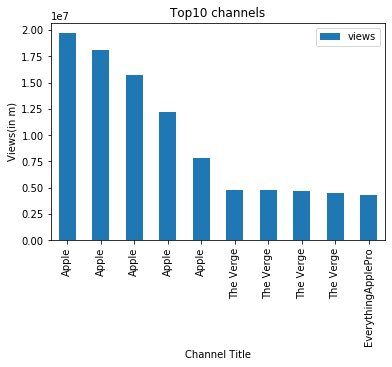

{'_id': ObjectId('5ddd74aee51c5e2b7e599325'), 'video_id': 'K4wEI5zhHB0', 'title': 'iPhone X — Introducing iPhone X — Apple', 'channel_title': 'Apple', 'category_id': 28, 'tags': 'Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone', 'views': 19707391, 'likes': 381919, 'dislikes': 69465, 'comment_total': 0, 'thumbnail_link': 'https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg', 'date': 17.09}


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.


In [16]:
Label_1 = widgets.Label('Enter the Tags')
display(Label_1)
Text_tags = widgets.Text(value='iPhone', disabled=False)
display(Text_tags)
btn = widgets.Button(description="show")
display(btn)
btn2 = widgets.Button(description="add to the Collection")
display(btn2)
mycol_1 = mydb["top_views"]
def show(b):
    tags = str(Text_tags.value)
    show.df_videos_top = df_videos[df_videos['tags'].str.contains(tags)].sort_values(by='views', ascending=False).head(10)
    ax = show.df_videos_top.plot(kind='bar',x='channel_title',y='views',title='Top10 channels')
    ax.set_xlabel('Channel Title')
    ax.set_ylabel('Views(in m)')
def add_col(b):
    ymax = max(show.df_videos_top.views)
    top_views = df_videos[df_videos.views == ymax]
    top_views_json = json.loads(top_views.to_json(orient='records'))
    
    mycol_1.insert(top_views_json)
    xx = mycol_1.find_one()
    print(xx)
btn.on_click(show)
btn2.on_click(add_col)


# Clearing the Database collection for views

In [17]:
v = mycol_1.delete_many({})
print(v.deleted_count, " documents deleted.")

15  documents deleted.


# Top 10 Channels based on Likes/Dislikes

Label(value='Enter the Tags')

Text(value='iPhone')

Button(description='show', style=ButtonStyle())

Button(description='add to the Collection', style=ButtonStyle())

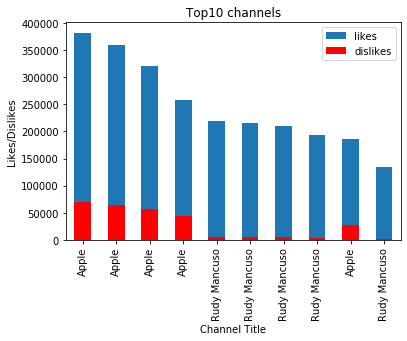

{'_id': ObjectId('5dde31bfe51c5e2b7e59932a'), 'video_id': 'K4wEI5zhHB0', 'title': 'iPhone X — Introducing iPhone X — Apple', 'channel_title': 'Apple', 'category_id': 28, 'tags': 'Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone', 'views': 19707391, 'likes': 381919, 'dislikes': 69465, 'comment_total': 0, 'thumbnail_link': 'https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg', 'date': 17.09}


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.


In [21]:
Label_1 = widgets.Label('Enter the Tags')
display(Label_1)
Text_likes = widgets.Text(value='iPhone', disabled=False)
display(Text_likes)
btn_likes = widgets.Button(description="show")
display(btn_likes)
btn2_likes = widgets.Button(description="add to the Collection")
display(btn2_likes)



def show_likes_dis(b):
    show_likes_dis.text_likes = str(Text_likes.value)
    show_likes_dis.df_videos_top1 = df_videos[df_videos['tags'].str.contains(show_likes_dis.text_likes)].sort_values(by='likes', ascending=False).head(10)
    ax = plt.gca() 
    show_likes_dis.df_videos_top1.plot(kind='bar',x='channel_title',y='likes',title='Top10 channels',ax=ax)
    show_likes_dis.df_videos_top1.plot(kind='bar',x='channel_title',y='dislikes',color='red',title='Top10 channels',ax=ax)
    ax.set_xlabel('Channel Title')
    ax.set_ylabel('Likes/Dislikes')
    
def store_likes_dis(b):
    ymax1 = max(show_likes_dis.df_videos_top1.likes)
    ymin1 = max(show_likes_dis.df_videos_top1.dislikes)
    top_likes = df_videos[df_videos.likes == ymax1]
    top_dislikes = df_videos[df_videos.dislikes == ymin1]
    top_likes_json = json.loads(top_likes.to_json(orient='records'))
    top_dislikes_json = json.loads(top_dislikes.to_json(orient='records'))
    mycol_3 = mydb["TopLikes"]
    mycol_3.insert(top_likes_json)
    #collection for top dislikes 
    mycol_2 = mydb["TopDislikes"]
    mycol_2.insert(top_dislikes_json)  
    topdislikes = mycol_2.find_one()
    print(topdislikes)
btn_likes.on_click(show_likes_dis)
btn2_likes.on_click(store_likes_dis)

# Relation between the category id and how many videos getting uploaded on that category.

Text(0, 0.5, 'Count')

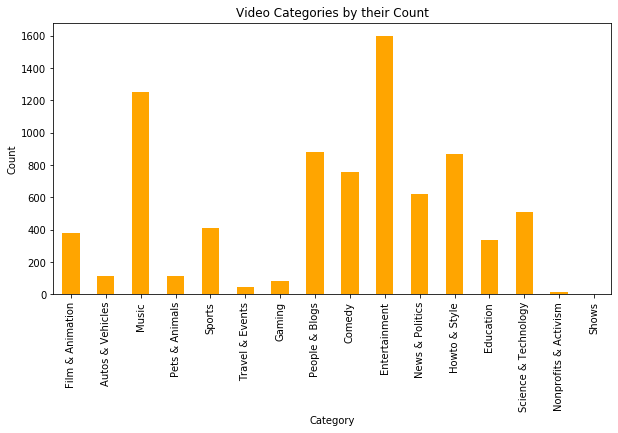

In [22]:
cat_id_mapping = {2:'Autos & Vehicles',1:'Film & Animation',
                  10:'Music',15:'Pets & Animals',17:'Sports',
                 19:'Travel & Events',20:'Gaming',22:'People & Blogs',
                 23:'Comedy',24:'Entertainment',25:'News & Politics',
                 26:'Howto & Style',27:'Education',28:'Science & Technology',
                  29:'Nonprofits & Activism',43:'Shows'}
df_videos_gb = df_videos.groupby('category_id').count()['title']
df_videos_gb = df_videos_gb.rename(cat_id_mapping)
ax = df_videos_gb.plot(kind='bar',title='Video Categories by their Count',color='orange',figsize=(10,5))
ax.set_xlabel('Category')
ax.set_ylabel('Count')

# Graph Showing the trending video like & dislike relation to their views & commen.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


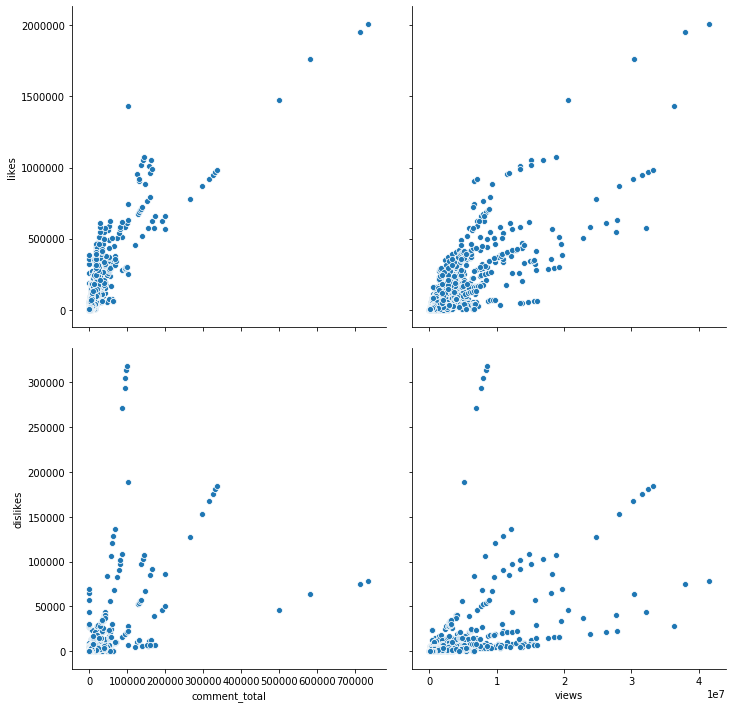

In [23]:
sns.pairplot(df_videos,x_vars=['comment_total','views'],y_vars=['likes','dislikes'],size=5)

# Relation between likes and views

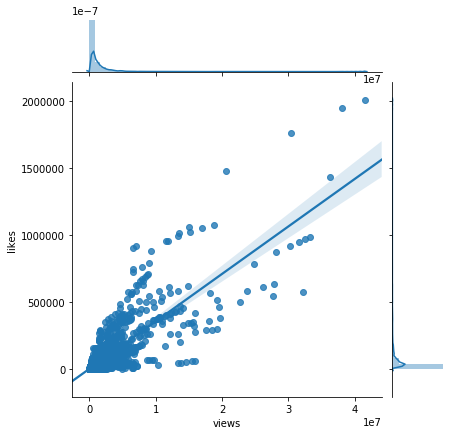

In [24]:
sns.jointplot(x='views',y='likes',data=df_videos,kind='reg')

# Sentiment Analysis on Youtube Comments

In [25]:
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
comm = pd.read_csv('UScomments.csv',encoding='utf8', error_bad_lines=False)
comm.head()
data = comm.sample(2000)
data.shape
#Calculating the Sentiment Polarity
pol=[] # list which will contain the polarity of the comments
for i in data.comment_text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)
#Adding the Sentiment Polarity column to the data
data['pol']=pol
#Converting the polarity values from continuous to categorical
data['pol'][data.pol==0]= 0
data['pol'][data.pol > 0]= 1
data['pol'][data.pol < 0]= -1
#Displaying the POSITIVE comments
df_positive = data[data.pol==1]
df_positive.head(10)
#Adding the Sentiment Polarity column to the data
data['pol']=pol
#Converting the polarity values from continuous to categorical
data['pol'][data.pol==0]= 0
data['pol'][data.pol > 0]= 1
data['pol'][data.pol < 0]= -1
#Displaying the POSITIVE comments
df_positive = data[data.pol==1]
df_positive.head(10)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


,video_id,comment_text,likes,replies,pol
541992,uCVuyIQZ-lA,i just love you,0,0,1.0
294789,aepr6ynzeX4,Omg I love it!!!!!!!! 😍,0,0,1.0
289611,o0Ddl1DI-go,Omgggggg I've been waiting for a natural hair ...,0,0,1.0
615758,aysB58GG3uM,Am I the only one who absolutely loves the out...,0,0,1.0
369067,NCFO5eifDtg,Loving all these collabs you've been doing Sea...,0,0,1.0
650868,CN4YL1KPDAA,Badminton! <3,0,0,1.0
447075,RyCDmg1JXcQ,My god this looks beautiful. I have the game o...,2,0,1.0
463389,pfQ09sKITss,Kim you do look like that... just embrace the ...,0,0,1.0
340408,GWKI-CoCCTU,"Looking fit Nile mate, best of luck!",0,0,1.0
687991,O12Rt0JSDpA,You are the best! ♡,0,0,1.0


# Displaying Negative Comments

In [26]:
#Displaying the NEGATIVE comments
df_negative = data[data.pol==-1]
df_negative.head(10)

,video_id,comment_text,likes,replies,pol
444860,eoAEp5A-arY,Did anyone else besides me scroll through the...,17,2,-1.0
524552,6u9LNN9HwC4,Looks shit. Why would Luke Skywalker be scared...,0,0,-1.0
102437,FfRGxN2zeWU,I have never had such long goosebumps for like...,0,0,-1.0
123385,N_zDcuX1Y54,Late sis,0,0,-1.0
608497,HYWiIWpcCIM,life is predetermined? i randomly decide to ge...,0,0,-1.0
135430,XvPWUkHjWG0,Video ideas... \n1: Sky zone with liza\n2: Dr...,0,0,-1.0
632091,hkA2a4_tNOs,This is completely random and sort of embarras...,0,0,-1.0
588204,Hlt3rA-oDao,At least the hillary joke was spot on,0,0,-1.0
6803,ah8SQNOXgrQ,You should stick to comedy sketches. Documenta...,0,0,-1.0
645188,miNpG98Hv1w,This reminds me how ugly I look,20,1,-1.0


# Displaying Neutral Comments

In [27]:
#Displaying the NEUTRAL comments
df_neutral = data[data.pol==0]
df_neutral.head(10)

,video_id,comment_text,likes,replies,pol
320327,5PaDeyRNUyc,jordyn and kylie should do a collab on a kyli...,0,0,0.0
207662,sa3G0vBlucg,This is supreme content! thank you for the con...,0,0,0.0
372658,D3bj3PH7PGg,Why is everyone bashing Trump?,0,0,0.0
402153,z5Wo-iF6lA8,Tim Cane grunt?,0,0,0.0
456644,z5Wo-iF6lA8,The end...is that not trademarked?,0,0,0.0
479333,q1PgzYjpjsE,Have you tried the duo contour sticks from Wet...,0,0,0.0
603946,LSYc5HvyXKo,Claudia 😍😍😍,0,0,0.0
561632,uCVuyIQZ-lA,EU TE AMO TANTO,0,0,0.0
452498,76WkDuiAjeY,"Please make cakes based on Indian theme,green ...",0,0,0.0
228796,D59v74k5flU,He actually uploaded this via smoke signals!,0,0,0.0


 1.0    884
 0.0    804
-1.0    312
Name: pol, dtype: int64

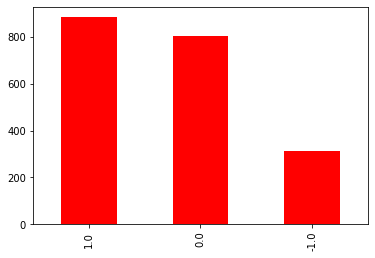

In [28]:
data.pol.value_counts().plot.bar(color="red")
data.pol.value_counts()

# Display Data based on their count

In [33]:
@interact
def show_articles_more_than(column=['views','comment_total','likes','dislikes'], x=(1000,500000,1000)):
    return df_videos.loc[df_videos[column] > x]

interactive(children=(Dropdown(description='column', options=('views', 'comment_total', 'likes', 'dislikes'), …

# Finding the Correlation Between Views, Comment_total, Likes, Dislikes

In [34]:
@interact
def correlations(column1=list(df_videos.select_dtypes('number').columns),
                column2=list(df_videos.select_dtypes('number').columns)):
    print(f"Correlation: {df_videos[column1].corr(df_videos[column2])}")

interactive(children=(Dropdown(description='column1', options=('category_id', 'views', 'likes', 'dislikes', 'c…

# Interactive Scatter Plot of the dataset

In [36]:
import cufflinks as cf
cf.go_offline(connected=True)


@interact_manual
def scatter_plot(x=list(df_videos.select_dtypes('number').columns),
                y=list(df_videos.select_dtypes('number').columns)[1:], theme=list(cf.themes.THEMES.keys()),
                colorscale=list(cf.colors._scales_names.keys())):
    df_videos.iplot(kind='scatter', x=x, y=y, mode='markers', xTitle=x.title(), yTitle=y.title(),
                   text='title',
                   title=f'{y.title()} vs {x.title()}',
                   theme=theme, colorscale=colorscale)
    

interactive(children=(Dropdown(description='x', options=('category_id', 'views', 'likes', 'dislikes', 'comment…